In [1]:
# Test of simple scraper and entity extractor.
import requests
import datetime
# import packages
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize #special package in pandas
import json
from matplotlib.pyplot import *
%matplotlib inline


In [2]:
# NSF awards API is found at: 
# https://www.research.gov/common/webapi/awardapisearch-v1.htm
nsf_awards_json_api = 'http://api.nsf.gov/services/v1/awards.json'
keywords = 'keyword=ai'

# Make the URL request
res = requests.get(nsf_awards_json_api + '?' + keywords)

# Get the awards data
json_response = res.json()["response"]
print(f'type(awards): {type(json_response)}')
awards = json_response["award"]

# Show each award in the list of awards
for award in awards:
    print('----')
    # Print the award info for each awardee
    print(f'agency: {award["agency"]}')
    print(f'awardeeCity: {award["awardeeCity"]}')
    print(f'awardeeName: {award["awardeeName"]}')
    print(f'awardeeStateCode: {award["awardeeStateCode"]}')
    print(f'fundsObligatedAmt: {award["fundsObligatedAmt"]}')
    print(f'id: {award["id"]}')
    print(f'piFirstName: {award["piFirstName"]}')
    print(f'piLastName: {award["piLastName"]}')
    print(f'publicAccessMandate: {award["publicAccessMandate"]}')
    print(f'date: {award["date"]}')
    print(f'title: {award["title"]}')

type(awards): <class 'dict'>
----
agency: NSF
awardeeCity: AMHERST
awardeeName: SUNY at Buffalo
awardeeStateCode: NY
fundsObligatedAmt: 10000000
id: 2229873
piFirstName: Venugopal
piLastName: Govindaraju
publicAccessMandate: 1
date: 01/06/2023
title: AI Institute for Transforming Education for Children with Speech and Language Processing Challenges
----
agency: NSF
awardeeCity: BALTIMORE
awardeeName: University of Maryland Baltimore County
awardeeStateCode: MD
fundsObligatedAmt: 160000
id: 2309760
piFirstName: Houbing
piLastName: Song
publicAccessMandate: 1
date: 12/13/2022
title: Collaborative Research: CyberTraining: Pilot: Operationalizing AI/Machine Learning for Cybersecurity Training
----
agency: NSF
awardeeCity: ATLANTA
awardeeName: Georgia Tech Research Corporation
awardeeStateCode: GA
fundsObligatedAmt: 7059902
id: 2247790
piFirstName: Ashok
piLastName: Goel
publicAccessMandate: 1
date: 10/27/2022
title: AI Institute for Adult Learning and Online Education (ALOE)
----
agency: N

In [3]:
nsf_awards_json_api = 'http://api.nsf.gov/services/v1/awards.json'
keywords = 'keyword=ai'

# Make the URL request
res = requests.get(nsf_awards_json_api + '?' + keywords)

# Get the awards data
json_response = res.json()["response"]
print(f'type(awards): {type(json_response)}')
awards = json_response["award"]

#print(awards)

type(awards): <class 'dict'>


In [4]:
#print(awards)
rdf = pd.json_normalize(awards)
rdf

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title
0,NSF,ATLANTA,Georgia Tech Research Corporation,GA,800000,2205152,Ali,Adibi,1,09/13/2022,SCH: Intelligent Radiology Through Human-Machi...
1,NSF,CORONA,New York Hall of Science,NY,74971,2230850,Dorothy,Bennett,1,08/31/2022,Conference on Human-Centered Approaches to Art...
2,NSF,PITTSBURGH,Carnegie-Mellon University,PA,790631,2211882,Tianqi,Chen,1,08/22/2022,CNS: Medium: Ground up Adaptive Learning Syste...
3,NSF,BOSTON,Northeastern University,MA,299375,2147220,Ronald,Sandler,1,07/07/2022,Research Community Development Grant: Summer T...
4,NSF,SAN BERNARDINO,University Enterprises Corporation at CSUSB,CA,97668,2142503,Yunfei,Hou,1,05/26/2022,Collaborative Research: Broadening Inclusive P...
5,NSF,FAYETTEVILLE,Fayetteville State University,NC,397055,2205502,Sambit,Bhattacharya,1,05/03/2022,Targeted Infusion Project: Exposing Students t...
6,NSF,NEW BRUNSWICK,Rutgers University New Brunswick,NJ,20000,2137245,Jorge,Ortiz,1,02/16/2022,IUCRC Planning Grant Rutgers University: Cente...
7,NSF,Richardson,University of Texas at Dallas,TX,96488,2146448,Shuang,Hao,1,01/13/2022,CAREER: Empowering White-box Driven Analytics ...
8,NSF,LOS ANGELES,OPAL AI INC.,CA,276000,2126752,Shahrouz,Alimo,1,01/03/2022,SBIR Phase I: Autonomous Floorplan Reconstruc...
9,NSF,PITTSBURGH,Carnegie-Mellon University,PA,866000,2118924,Nikolas,Martelaro,1,08/12/2021,Supporting Designers in Learning to Co-create ...


In [5]:
rdf.shape

(25, 11)

In [6]:
rdf['Date2'] = rdf['date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))
rdf.head()

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2
0,NSF,ATLANTA,Georgia Tech Research Corporation,GA,800000,2205152,Ali,Adibi,1,09/13/2022,SCH: Intelligent Radiology Through Human-Machi...,2022-09-13
1,NSF,CORONA,New York Hall of Science,NY,74971,2230850,Dorothy,Bennett,1,08/31/2022,Conference on Human-Centered Approaches to Art...,2022-08-31
2,NSF,PITTSBURGH,Carnegie-Mellon University,PA,790631,2211882,Tianqi,Chen,1,08/22/2022,CNS: Medium: Ground up Adaptive Learning Syste...,2022-08-22
3,NSF,BOSTON,Northeastern University,MA,299375,2147220,Ronald,Sandler,1,07/07/2022,Research Community Development Grant: Summer T...,2022-07-07
4,NSF,SAN BERNARDINO,University Enterprises Corporation at CSUSB,CA,97668,2142503,Yunfei,Hou,1,05/26/2022,Collaborative Research: Broadening Inclusive P...,2022-05-26


In [7]:
rdf['NAME'] = rdf['piFirstName'] + " " + rdf['piLastName']
rdf.head()

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2,NAME
0,NSF,ATLANTA,Georgia Tech Research Corporation,GA,800000,2205152,Ali,Adibi,1,09/13/2022,SCH: Intelligent Radiology Through Human-Machi...,2022-09-13,Ali Adibi
1,NSF,CORONA,New York Hall of Science,NY,74971,2230850,Dorothy,Bennett,1,08/31/2022,Conference on Human-Centered Approaches to Art...,2022-08-31,Dorothy Bennett
2,NSF,PITTSBURGH,Carnegie-Mellon University,PA,790631,2211882,Tianqi,Chen,1,08/22/2022,CNS: Medium: Ground up Adaptive Learning Syste...,2022-08-22,Tianqi Chen
3,NSF,BOSTON,Northeastern University,MA,299375,2147220,Ronald,Sandler,1,07/07/2022,Research Community Development Grant: Summer T...,2022-07-07,Ronald Sandler
4,NSF,SAN BERNARDINO,University Enterprises Corporation at CSUSB,CA,97668,2142503,Yunfei,Hou,1,05/26/2022,Collaborative Research: Broadening Inclusive P...,2022-05-26,Yunfei Hou


In [8]:
#Number of dollars overtime 
#agg_funds = rdf[['fundsObligatedAmt','Date2']].groupby(['Date2']).agg('sum')
#agg_funds
#agg_funds= agg_funds.reset_index()
#agg_funds.columns = ["Date","Total Funds Obligated Amount"]
#agg_funds

In [9]:
agg_funds2 = rdf[['fundsObligatedAmt','Date2']].groupby(['Date2']).describe()
agg_funds2
agg_funds2= agg_funds2.reset_index()
agg_funds2.columns = ["Date","Count","Unique","Total Funds Obligated Amount","Freq"]
agg_funds2
agg_funds_date = agg_funds2.drop(['Unique', 'Freq'], axis=1)
agg_funds_date

,Date,Count,Total Funds Obligated Amount
0,2020-07-09,1,83529
1,2020-07-16,1,49952
2,2020-07-28,1,299987
3,2020-07-29,1,316000
4,2020-08-21,2,98280
5,2020-08-25,2,11996931
6,2021-04-27,2,299934
7,2021-05-24,1,299926
8,2021-05-27,2,146000
9,2021-07-12,1,986535


In [10]:
#agg_funds['Total Funds Obligated Amount']=agg_funds['Total Funds Obligated Amount'].astype(float)
#agg_funds.dtypes

agg_funds_date['Total Funds Obligated Amount']=agg_funds_date['Total Funds Obligated Amount'].astype(float)
agg_funds_date.dtypes

Date                             object
Count                            object
Total Funds Obligated Amount    float64
dtype: object

In [11]:
#finalsorted_date = agg_funds.sort_values(by = ['Total Funds Obligated Amount'], ascending = [True])
#finalsorted_date
final_date = agg_funds_date.sort_values(by = ['Date'], ascending = [True])
final_date

,Date,Count,Total Funds Obligated Amount
0,2020-07-09,1,83529.0
1,2020-07-16,1,49952.0
2,2020-07-28,1,299987.0
3,2020-07-29,1,316000.0
4,2020-08-21,2,98280.0
5,2020-08-25,2,11996931.0
6,2021-04-27,2,299934.0
7,2021-05-24,1,299926.0
8,2021-05-27,2,146000.0
9,2021-07-12,1,986535.0


In [12]:
final_date2 = agg_funds_date.sort_values(by = ['Total Funds Obligated Amount'], ascending = [True])
final_date2

,Date,Count,Total Funds Obligated Amount
14,2022-02-16,1,20000.0
1,2020-07-16,1,49952.0
19,2022-08-31,1,74971.0
0,2020-07-09,1,83529.0
13,2022-01-13,1,96488.0
16,2022-05-26,1,97668.0
4,2020-08-21,2,98280.0
8,2021-05-27,2,146000.0
12,2022-01-03,1,276000.0
17,2022-07-07,1,299375.0


In [13]:
#money_overtime = final_date.plot.line(x='Date', y='Total Funds Obligated Amount', title="Money Overtime")

In [14]:
#agg_awarde = rdf[['awardeeName','fundsObligatedAmt']].groupby(['awardeeName']).agg('sum')
#agg_awarde
#agg_awarde= agg_awarde.reset_index()
#agg_awarde.columns = ["Awardee Name","Total Funds Obligated Amount"]
#agg_awarde

In [15]:
agg_awarde_school = rdf[['awardeeName','fundsObligatedAmt']].groupby(['awardeeName']).describe()
agg_awarde_school
agg_awarde_school= agg_awarde_school.reset_index()
agg_awarde_school.columns = ["Awardee Name","Count","Unique","Total Funds Obligated Amount","Freq"]
agg_awarde_school
agg_awarde_school = agg_awarde_school.drop(['Unique', 'Freq'], axis=1)
agg_awarde_school

,Awardee Name,Count,Total Funds Obligated Amount
0,Carnegie-Mellon University,2,790631
1,Clemson University,1,146000
2,Digital Promise Global,1,49952
3,Fayetteville State University,1,397055
4,Georgia Tech Research Corporation,2,800000
5,Miami Dade College,1,986535
6,New York Hall of Science,1,74971
7,New York University,1,299926
8,North Carolina Agricultural & Technical State ...,1,100000
9,Northeastern University,1,299375


In [16]:
agg_awarde_school['Total Funds Obligated Amount']=agg_awarde_school['Total Funds Obligated Amount'].astype(str).astype(float)
agg_awarde_school.dtypes

Awardee Name                     object
Count                            object
Total Funds Obligated Amount    float64
dtype: object

In [17]:
finalsorted_school = agg_awarde_school.sort_values(by = ['Total Funds Obligated Amount'], ascending = [True])
finalsorted_school

,Awardee Name,Count,Total Funds Obligated Amount
19,University of Notre Dame,1,0.0
13,Rutgers University New Brunswick,1,20000.0
2,Digital Promise Global,1,49952.0
6,New York Hall of Science,1,74971.0
11,Ohio State University,1,83529.0
21,University of Texas at Dallas,1,96488.0
14,University Enterprises Corporation at CSUSB,1,97668.0
16,University of California-Los Angeles,1,98280.0
8,North Carolina Agricultural & Technical State ...,1,100000.0
1,Clemson University,1,146000.0


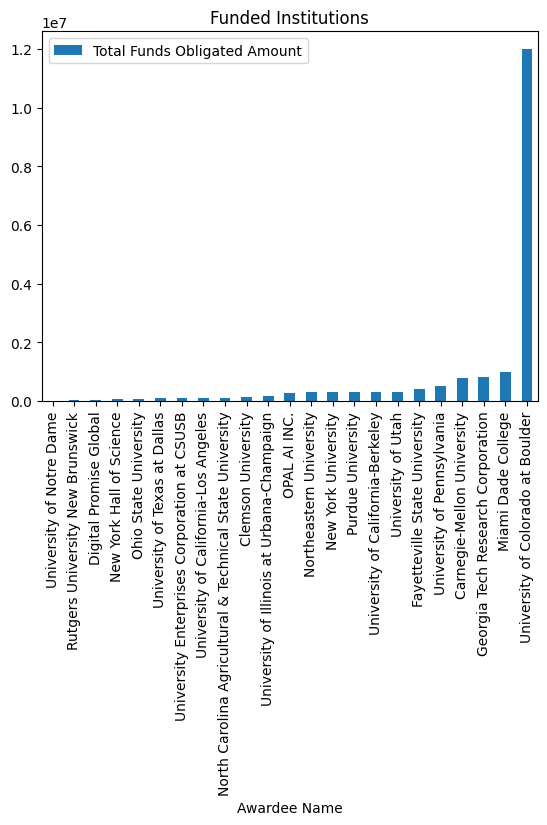

In [18]:
funded_schools = finalsorted_school.plot.bar(x='Awardee Name', y='Total Funds Obligated Amount', title="Funded Institutions")

In [19]:
#Take a table listing all the researchers and total amount of dollars the researchers 
#received. Most money is at the money.
agg_name = rdf[['NAME','fundsObligatedAmt']].groupby(['NAME']).agg('sum')
agg_name
agg_name= agg_name.reset_index()
agg_name.columns = ["Name","Total Funds Obligated Amount"]
agg_name


,Name,Total Funds Obligated Amount
0,Ali Adibi,800000
1,Antonio Delgado,986535
2,Carlos Fernandez Granda,299926
3,Colleen Lewis,168670
4,Dong Wang,0
5,Dorothy Bennett,74971
6,Eliane Wiese,316000
7,James Davis,98280
8,Jeremy Roschelle,49952
9,Jin Wei-Kocsis,299934


In [20]:
agg_name['Total Funds Obligated Amount']=agg_name['Total Funds Obligated Amount'].astype(str).astype(float)
agg_name.dtypes

Name                             object
Total Funds Obligated Amount    float64
dtype: object

In [21]:
finalsorted_name = agg_name.sort_values(by = ['Total Funds Obligated Amount'], ascending = [True])
finalsorted_name

,Name,Total Funds Obligated Amount
4,Dong Wang,0.0
10,Jorge Ortiz,20000.0
8,Jeremy Roschelle,49952.0
5,Dorothy Bennett,74971.0
11,Julie Martin,83529.0
19,Shuang Hao,96488.0
24,Yunfei Hou,97668.0
7,James Davis,98280.0
23,Xiaohong Yuan,100000.0
13,Long Cheng,146000.0


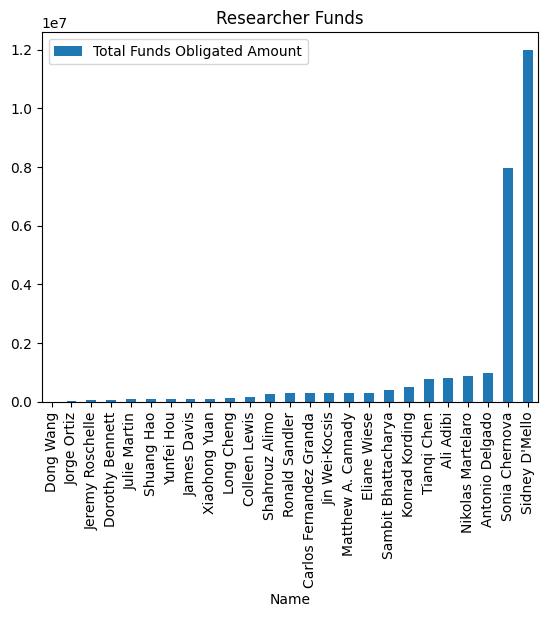

In [22]:
name_funds = finalsorted_name.plot.bar(x='Name', y='Total Funds Obligated Amount', title="Researcher Funds")

In [23]:
#Nested topics (search for ai or machine learning and then do search by deep learning, 
# statistical machine learning, transformers)

In [24]:
df = rdf.copy(deep=True)
df

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2,NAME
0,NSF,ATLANTA,Georgia Tech Research Corporation,GA,800000,2205152,Ali,Adibi,1,09/13/2022,SCH: Intelligent Radiology Through Human-Machi...,2022-09-13,Ali Adibi
1,NSF,CORONA,New York Hall of Science,NY,74971,2230850,Dorothy,Bennett,1,08/31/2022,Conference on Human-Centered Approaches to Art...,2022-08-31,Dorothy Bennett
2,NSF,PITTSBURGH,Carnegie-Mellon University,PA,790631,2211882,Tianqi,Chen,1,08/22/2022,CNS: Medium: Ground up Adaptive Learning Syste...,2022-08-22,Tianqi Chen
3,NSF,BOSTON,Northeastern University,MA,299375,2147220,Ronald,Sandler,1,07/07/2022,Research Community Development Grant: Summer T...,2022-07-07,Ronald Sandler
4,NSF,SAN BERNARDINO,University Enterprises Corporation at CSUSB,CA,97668,2142503,Yunfei,Hou,1,05/26/2022,Collaborative Research: Broadening Inclusive P...,2022-05-26,Yunfei Hou
5,NSF,FAYETTEVILLE,Fayetteville State University,NC,397055,2205502,Sambit,Bhattacharya,1,05/03/2022,Targeted Infusion Project: Exposing Students t...,2022-05-03,Sambit Bhattacharya
6,NSF,NEW BRUNSWICK,Rutgers University New Brunswick,NJ,20000,2137245,Jorge,Ortiz,1,02/16/2022,IUCRC Planning Grant Rutgers University: Cente...,2022-02-16,Jorge Ortiz
7,NSF,Richardson,University of Texas at Dallas,TX,96488,2146448,Shuang,Hao,1,01/13/2022,CAREER: Empowering White-box Driven Analytics ...,2022-01-13,Shuang Hao
8,NSF,LOS ANGELES,OPAL AI INC.,CA,276000,2126752,Shahrouz,Alimo,1,01/03/2022,SBIR Phase I: Autonomous Floorplan Reconstruc...,2022-01-03,Shahrouz Alimo
9,NSF,PITTSBURGH,Carnegie-Mellon University,PA,866000,2118924,Nikolas,Martelaro,1,08/12/2021,Supporting Designers in Learning to Co-create ...,2021-08-12,Nikolas Martelaro


In [25]:
res_transformers = requests.get(nsf_awards_json_api + '?' + 'keyword=transformers')
json_response_tran = res_transformers.json()["response"]
print(f'type(awards): {type(json_response_tran)}')
awards_tran = json_response_tran["award"]


type(awards): <class 'dict'>


In [26]:
df_tran = pd.json_normalize(awards_tran)
df_tran

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title
0,NSF,KALAMAZOO,Western Michigan University,MI,199105,2138408,Pablo,Gomez,1,02/22/2022,ERI: Multiphysics cosimulation approach for op...
1,NSF,PRINCETON,Princeton University,NJ,194635,2203399,Niraj,Jha,1,01/28/2022,CCF: SHF: Small: Transformer synthesis
2,NSF,STATE COLLEGE,"Solid State Ceramics, Inc.",PA,764749,1632476,Safakcan,Tuncdemir,1,09/22/2016,STTR Phase II: Low Temperature Cofired Multil...
3,NSF,GAINESVILLE,University of Florida,FL,200000,1611048,Shuo,Wang,0,08/17/2016,High Frequency Transformer Winding Power Loss ...
4,NSF,LINCOLN,University of Nebraska-Lincoln,NE,500000,1554497,Liyan,Qu,0,01/27/2016,CAREER: Adjustable-Voltage-Ratio Magnetoelectr...
5,NSF,BROOKLYN,HIGHEST Transformers Inc.,NY,207832,1521233,Qiong,Wu,0,06/24/2015,STTR Phase I: Research and Development of Hig...
6,NSF,STATE COLLEGE,"Solid State Ceramics, Inc.",PA,224967,1448918,Safakcan,Tuncdemir,0,12/19/2014,STTR Phase I: Low Temperature Cofired Multila...
7,NSF,BURLINGTON,"Winchester Technologies, LLC",MA,150000,1315213,Nian-xiang,Sun,0,05/30/2013,SBIR Phase I: Compact and Power Efficient Int...
8,NSF,BLACKSBURG,Virginia Polytechnic Institute and State Unive...,VA,270962,9810688,Anbo,Wang,0,05/05/1999,Optical Fiber Sensor-Based Techniques for On-L...
9,NSF,Stanford,Stanford University,CA,360000,1808489,Juan Manuel,Rivas-Davila,1,08/14/2018,High-Voltage High-Power-Density Power Electron...


In [27]:
df_tran['Date2'] = df_tran['date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))
df_tran.head()

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2
0,NSF,KALAMAZOO,Western Michigan University,MI,199105,2138408,Pablo,Gomez,1,02/22/2022,ERI: Multiphysics cosimulation approach for op...,2022-02-22
1,NSF,PRINCETON,Princeton University,NJ,194635,2203399,Niraj,Jha,1,01/28/2022,CCF: SHF: Small: Transformer synthesis,2022-01-28
2,NSF,STATE COLLEGE,"Solid State Ceramics, Inc.",PA,764749,1632476,Safakcan,Tuncdemir,1,09/22/2016,STTR Phase II: Low Temperature Cofired Multil...,2016-09-22
3,NSF,GAINESVILLE,University of Florida,FL,200000,1611048,Shuo,Wang,0,08/17/2016,High Frequency Transformer Winding Power Loss ...,2016-08-17
4,NSF,LINCOLN,University of Nebraska-Lincoln,NE,500000,1554497,Liyan,Qu,0,01/27/2016,CAREER: Adjustable-Voltage-Ratio Magnetoelectr...,2016-01-27


In [28]:
df_tran['NAME'] = df_tran['piFirstName'] + " " + df_tran['piLastName']
df_tran.head()

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2,NAME
0,NSF,KALAMAZOO,Western Michigan University,MI,199105,2138408,Pablo,Gomez,1,02/22/2022,ERI: Multiphysics cosimulation approach for op...,2022-02-22,Pablo Gomez
1,NSF,PRINCETON,Princeton University,NJ,194635,2203399,Niraj,Jha,1,01/28/2022,CCF: SHF: Small: Transformer synthesis,2022-01-28,Niraj Jha
2,NSF,STATE COLLEGE,"Solid State Ceramics, Inc.",PA,764749,1632476,Safakcan,Tuncdemir,1,09/22/2016,STTR Phase II: Low Temperature Cofired Multil...,2016-09-22,Safakcan Tuncdemir
3,NSF,GAINESVILLE,University of Florida,FL,200000,1611048,Shuo,Wang,0,08/17/2016,High Frequency Transformer Winding Power Loss ...,2016-08-17,Shuo Wang
4,NSF,LINCOLN,University of Nebraska-Lincoln,NE,500000,1554497,Liyan,Qu,0,01/27/2016,CAREER: Adjustable-Voltage-Ratio Magnetoelectr...,2016-01-27,Liyan Qu


In [29]:
df_tran.dtypes

agency                 object
awardeeCity            object
awardeeName            object
awardeeStateCode       object
fundsObligatedAmt      object
id                     object
piFirstName            object
piLastName             object
publicAccessMandate    object
date                   object
title                  object
Date2                  object
NAME                   object
dtype: object

In [30]:
df.dtypes

agency                 object
awardeeCity            object
awardeeName            object
awardeeStateCode       object
fundsObligatedAmt      object
id                     object
piFirstName            object
piLastName             object
publicAccessMandate    object
date                   object
title                  object
Date2                  object
NAME                   object
dtype: object

In [31]:
common=df.merge(df_tran, how = 'inner' ,indicator=False)
common

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2,NAME


In [32]:
#as shown above, 0 matches between AI and transformers, but transformers is a nested topic of AI

In [33]:
df["Organization & Professor"] = df["awardeeName"] + " " + df["NAME"]
df

,agency,awardeeCity,awardeeName,awardeeStateCode,fundsObligatedAmt,id,piFirstName,piLastName,publicAccessMandate,date,title,Date2,NAME,Organization & Professor
0,NSF,ATLANTA,Georgia Tech Research Corporation,GA,800000,2205152,Ali,Adibi,1,09/13/2022,SCH: Intelligent Radiology Through Human-Machi...,2022-09-13,Ali Adibi,Georgia Tech Research Corporation Ali Adibi
1,NSF,CORONA,New York Hall of Science,NY,74971,2230850,Dorothy,Bennett,1,08/31/2022,Conference on Human-Centered Approaches to Art...,2022-08-31,Dorothy Bennett,New York Hall of Science Dorothy Bennett
2,NSF,PITTSBURGH,Carnegie-Mellon University,PA,790631,2211882,Tianqi,Chen,1,08/22/2022,CNS: Medium: Ground up Adaptive Learning Syste...,2022-08-22,Tianqi Chen,Carnegie-Mellon University Tianqi Chen
3,NSF,BOSTON,Northeastern University,MA,299375,2147220,Ronald,Sandler,1,07/07/2022,Research Community Development Grant: Summer T...,2022-07-07,Ronald Sandler,Northeastern University Ronald Sandler
4,NSF,SAN BERNARDINO,University Enterprises Corporation at CSUSB,CA,97668,2142503,Yunfei,Hou,1,05/26/2022,Collaborative Research: Broadening Inclusive P...,2022-05-26,Yunfei Hou,University Enterprises Corporation at CSUSB Yu...
5,NSF,FAYETTEVILLE,Fayetteville State University,NC,397055,2205502,Sambit,Bhattacharya,1,05/03/2022,Targeted Infusion Project: Exposing Students t...,2022-05-03,Sambit Bhattacharya,Fayetteville State University Sambit Bhattacharya
6,NSF,NEW BRUNSWICK,Rutgers University New Brunswick,NJ,20000,2137245,Jorge,Ortiz,1,02/16/2022,IUCRC Planning Grant Rutgers University: Cente...,2022-02-16,Jorge Ortiz,Rutgers University New Brunswick Jorge Ortiz
7,NSF,Richardson,University of Texas at Dallas,TX,96488,2146448,Shuang,Hao,1,01/13/2022,CAREER: Empowering White-box Driven Analytics ...,2022-01-13,Shuang Hao,University of Texas at Dallas Shuang Hao
8,NSF,LOS ANGELES,OPAL AI INC.,CA,276000,2126752,Shahrouz,Alimo,1,01/03/2022,SBIR Phase I: Autonomous Floorplan Reconstruc...,2022-01-03,Shahrouz Alimo,OPAL AI INC. Shahrouz Alimo
9,NSF,PITTSBURGH,Carnegie-Mellon University,PA,866000,2118924,Nikolas,Martelaro,1,08/12/2021,Supporting Designers in Learning to Co-create ...,2021-08-12,Nikolas Martelaro,Carnegie-Mellon University Nikolas Martelaro


In [34]:
df.dtypes

agency                      object
awardeeCity                 object
awardeeName                 object
awardeeStateCode            object
fundsObligatedAmt           object
id                          object
piFirstName                 object
piLastName                  object
publicAccessMandate         object
date                        object
title                       object
Date2                       object
NAME                        object
Organization & Professor    object
dtype: object

In [35]:
#df['Organization & Professor']=df['Organization & Professor'].to_string()

In [36]:
print(df['Organization & Professor'].to_string())

0           Georgia Tech Research Corporation Ali Adibi
1              New York Hall of Science Dorothy Bennett
2                Carnegie-Mellon University Tianqi Chen
3                Northeastern University Ronald Sandler
4     University Enterprises Corporation at CSUSB Yu...
5     Fayetteville State University Sambit Bhattacharya
6          Rutgers University New Brunswick Jorge Ortiz
7              University of Texas at Dallas Shuang Hao
8                           OPAL AI INC. Shahrouz Alimo
9          Carnegie-Mellon University Nikolas Martelaro
10     Georgia Tech Research Corporation Sonia Chernova
11                   Miami Dade College Antonio Delgado
12                        Clemson University Long Cheng
13    North Carolina Agricultural & Technical State ...
14          New York University Carlos Fernandez Granda
15                     Purdue University Jin Wei-Kocsis
16    University of Illinois at Urbana-Champaign Col...
17     University of Colorado at Boulder Sidney 

In [37]:
import requests

#URL https://programmablesearchengine.google.com/cse?cx=13fdfa3a33e174664

# get the API KEY here: https://developers.google.com/custom-search/v1/overview
API_KEY = ""

# get your Search Engine ID on your CSE control panel
SEARCH_ENGINE_ID = ""

In [38]:
link_list = []
for x in df['Organization & Professor']:
    query = x + " Research Group"
    page = 1
    start = (page - 1) * 10 + 1
    url = f"https://www.googleapis.com/customsearch/v1?key={API_KEY}&cx={SEARCH_ENGINE_ID}&q={query}&start={start}"
    data = requests.get(url, verify=False).json()
    search_items = data.get("items")
    for i, search_item in enumerate(search_items, start=1):
        print(search_item["link"])
        link_list.append(search_item["link"])


/Users/far/Desktop/Personal Project/tech_scout2/tech_scout/env/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


TypeError: 'NoneType' object is not iterable

In [ ]:
for x in df['Organization & Professor']:
    query = x + " Research Group"
    print(query)
    print(type(query))
    page = 1
    start = (page - 1) * 10 + 1
    url = f"https://www.googleapis.com/customsearch/v1?key={API_KEY}&cx={SEARCH_ENGINE_ID}&q={query}&start={start}"
    data = requests.get(url, verify=False).json()
    search_items = data.get("items")
    print(search_items)
    # iterate over 10 results found
    for i, search_item in enumerate(search_items, start=1):
        print('-----------')
        # Use the following to see other available keys
        #print(f'{search_item}, type: {type(search_item)}')
        #print(f'Title: {search_item["title"]}')
        print(f'Link: {search_item["link"]}')
        #listie.append({search_item["link"]})
        #print(f'Snippet: {search_item["snippet"]}')
        #print(f'Pagemap: {search_item["pagemap"]}')

    

In [ ]:
df.head()